In [7]:
import os
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as lsc
import torch
import h5py
import time
from deeplsd.utils.tensor import batch_to_device
from deeplsd.models.deeplsd_inference import DeepLSD
from deeplsd.geometry.viz_2d import plot_images, plot_lines

In [11]:


# Model config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
conf = {
    'detect_lines': True,  # Whether to detect lines or only DF/AF
    'line_detection_params': {
        'merge': False,  # Whether to merge close-by lines
        'filtering': True,  # Whether to filter out lines based on the DF/AF. Use 'strict' to get an even stricter filtering
        'grad_thresh': 3,
        'grad_nfa': True,  # If True, use the image gradient and the NFA score of LSD to further threshold lines. We recommand using it for easy images, but to turn it off for challenging images (e.g. night, foggy, blurry images)
    }
}

# Load the model
#ckpt = '../weights/deeplsd_md.tar'
ckpt = '/home/hh/Documents/DeepLSD/my_experiment/deeplsd_wireframe/checkpoint_0_2000.tar'

ckpt = torch.load(str(ckpt), map_location='cpu')
net = DeepLSD(conf)
net.load_state_dict(ckpt['model'])
net = net.to(device).eval()

cuda


In [15]:
def process_image(image_path):
    start_time = time.time()
    
    # Load an image
    img = cv2.imread(image_path)[:, :, ::-1]
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    inputs = {'image': torch.tensor(gray_img, dtype=torch.float, device=device)[None, None] / 255.}
    
    with torch.no_grad():
        out = net(inputs)
        pred_lines = out['lines'][0]
    
    end_time = time.time()
    #print(pred_lines)
    # 计算并打印运行时间
    inference_time = end_time - start_time
    print(f"Network inference time for {image_path}: {inference_time:.4f} seconds")
    plot_images([img], ['DeepLSD lines'], cmaps='gray')
    plot_lines([pred_lines], indices=range(1))
    return inference_time
    # 可以选择在此处打印或保存 


Network inference time for /home/hh/Documents/DeepLSD/assets/images/example.jpg: 0.1704 seconds


0.17037463188171387

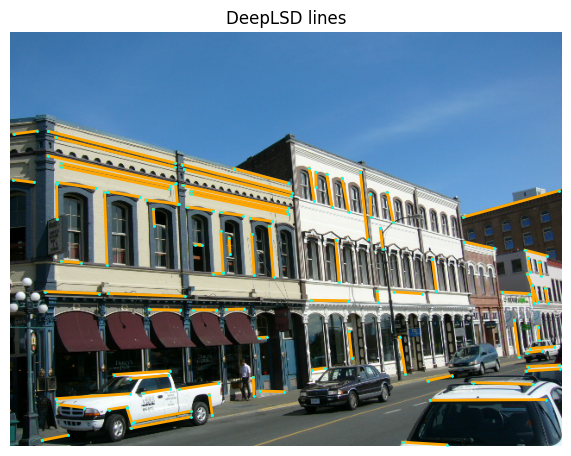

In [17]:
process_image('/home/hh/Documents/DeepLSD/assets/images/example.jpg')

In [18]:
import time 


with open('/home/hh/Documents/DeepLSD/init_dataset_txt/wireframe.txt', 'r') as file:
    image_paths = file.readlines()

# 去除每行末尾的换行符
image_paths = [path.strip() for path in image_paths]

# 初始化一个列表来存储每张图片的推理时间
inference_times = []

# 遍历每个图片路径并进行处理
for image_path in image_paths:
    inference_time = process_image(image_path)
    inference_times.append(inference_time)

    
    # 计算并打印平均推理时间
average_inference_time = sum(inference_times) / len(inference_times)
print(f"Average network inference time: {average_inference_time:.4f} seconds")

# Detect (and optionally refine) the lines
#start_time = time.time()
# Load an image
#img = cv2.imread('../assets/images/example.jpg')[:, :, ::-1]
#gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#inputs = {'image': torch.tensor(gray_img, dtype=torch.float, device=device)[None, None] / 255.}
#with torch.no_grad():
#    out = net(inputs)
#    pred_lines = out['lines'][0]
#    
#end_time = time.time()
#print(pred_lines)
# Plot the predictions
# 计算并打印运行时间
#inference_time = end_time - start_time
#print(f"Network inference time: {inference_time:.4f} seconds") 

#plot_images([img], ['DeepLSD lines'], cmaps='gray')
#plot_lines([pred_lines], indices=range(1))


RuntimeError: The size of tensor a (248) must match the size of tensor b (249) at non-singleton dimension 2

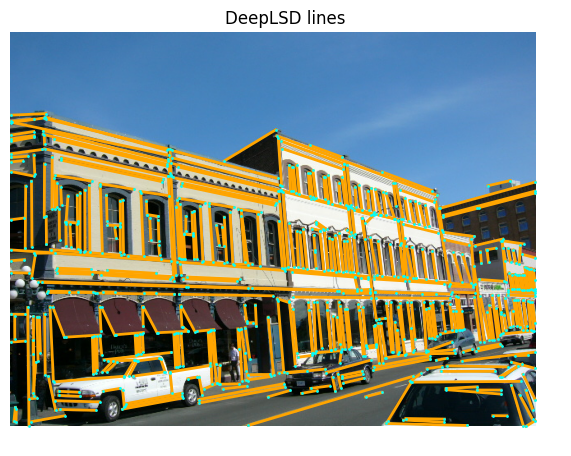

In [18]:
import os
import shutil

# 定义路径
test_images_file = '/home/hh/Documents/DeepLSD/init_dataset_txt/wireframe.txt'
source_dir = '/home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_ha5'
destination_dir = '/home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_test'

# 确保目标文件夹存在
os.makedirs(destination_dir, exist_ok=True)

# 读取测试集图片路径
with open(test_images_file, 'r') as file:
    test_image_paths = file.readlines()

# 去除每行末尾的换行符，并提取文件名（不包括扩展名）
test_image_filenames = [os.path.splitext(os.path.basename(path.strip()))[0] for path in test_image_paths]


In [19]:
# 遍历每个测试集文件名并进行转移
for filename in test_image_filenames:
    src_file = os.path.join(source_dir, f'{filename}.hdf5')
    dst_file = os.path.join(destination_dir, f'{filename}.hdf5')
    
    if os.path.exists(src_file):
        shutil.move(src_file, dst_file)
        print(f'Moved: {src_file} to {dst_file}')
    else:
        print(f'File not found: {src_file}')


Moved: /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_ha5/00060700.hdf5 to /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_test/00060700.hdf5
Moved: /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_ha5/00291405.hdf5 to /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_test/00291405.hdf5
Moved: /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_ha5/00113148.hdf5 to /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_test/00113148.hdf5
Moved: /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_ha5/00037212.hdf5 to /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_test/00037212.hdf5
Moved: /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_ha5/00243732.hdf5 to /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_test/00243732.hdf5
Moved: /home/hh/Documents/DeepLSD/GT_datasets/export_datasets/wireframe_ha5/00102394.hdf5 to /home/hh/Documents/Dee